In [38]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt

In [39]:
mypath = "Data"
filename = "odx_df_test.csv"

some_dtypes = {'ARRIVAL_TM_HM':object}
df = pd.read_csv(join(mypath,filename),parse_dates= ['APC_TIME','Transaction_dtm'])
# df['Transaction_dtm'][0].month_name()
# (df["APC_TIME"][~df["APC_TIME"].isnull()])[305]
# type(df["APC_ROUTES"][0])

In [45]:
# going to start with a data frame
# trying to find the destionations of the origins of whole trips

buzz_ids = set(df.Serial_Nbr)
print(len(buzz_ids))
print(len(df)/len(buzz_ids))

34752
3.505668738489871


In [56]:
%%time
x = []
for b,g in df.groupby('Serial_Nbr'):
    x.append(len(g))
    a = g

CPU times: user 5.36 s, sys: 20.4 ms, total: 5.38 s
Wall time: 5.38 s


In [64]:
g.sort_values("Transaction_dtm")

,Unnamed: 0,APC_ROUTES,APC_TIME,Dev_Operator,MEGA_STOP,Serial_Nbr,Transaction_dtm,bus_id,ctl_grp_short_desc,route_name,route_no,use_type_desc
9773,10311311,143.0,2018-01-30 07:43:00,MARTA Bus,M5198,2147055196,2018-01-30 07:35:29,2503.0,Garage - Brady,Windward Park & Ride,143.0,Entry (Tag On)
74737,23752,NaN,NaT,MARTA Rail,M268,2147055196,2018-01-30 18:10:20,NaN,Gate - North Springs,NaN,NaN,Exit (Tag Off)
42379,10307160,NaN,NaT,MARTA Bus,NaN,2147055196,2018-01-30 18:11:17,1485.0,Garage - Laredo,Windward Park & Ride,143.0,Transfer


(array([0.0000e+00, 4.1210e+03, 1.1527e+04, 3.7800e+03, 7.0220e+03,
        2.4070e+03, 2.7390e+03, 1.1780e+03, 9.8100e+02, 3.8400e+02,
        2.2800e+02, 1.3900e+02, 9.3000e+01, 5.1000e+01, 3.9000e+01,
        1.7000e+01, 1.8000e+01, 8.0000e+00, 1.1000e+01, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

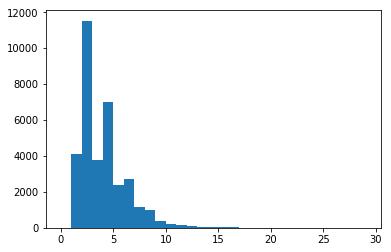

In [63]:
sorted((s,x.count(s)) for s in set(x))
plt.hist(x,bins=range(30))